# 1. Предсказание цены на недвижимость

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [3]:
from sklearn.datasets import load_boston

In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

X, y = load_boston(return_X_y = True)

In [9]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = load_boston()

In [7]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = data['target']

In [14]:
X.shape

(506, 13)

In [16]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
y.shape

(506,)

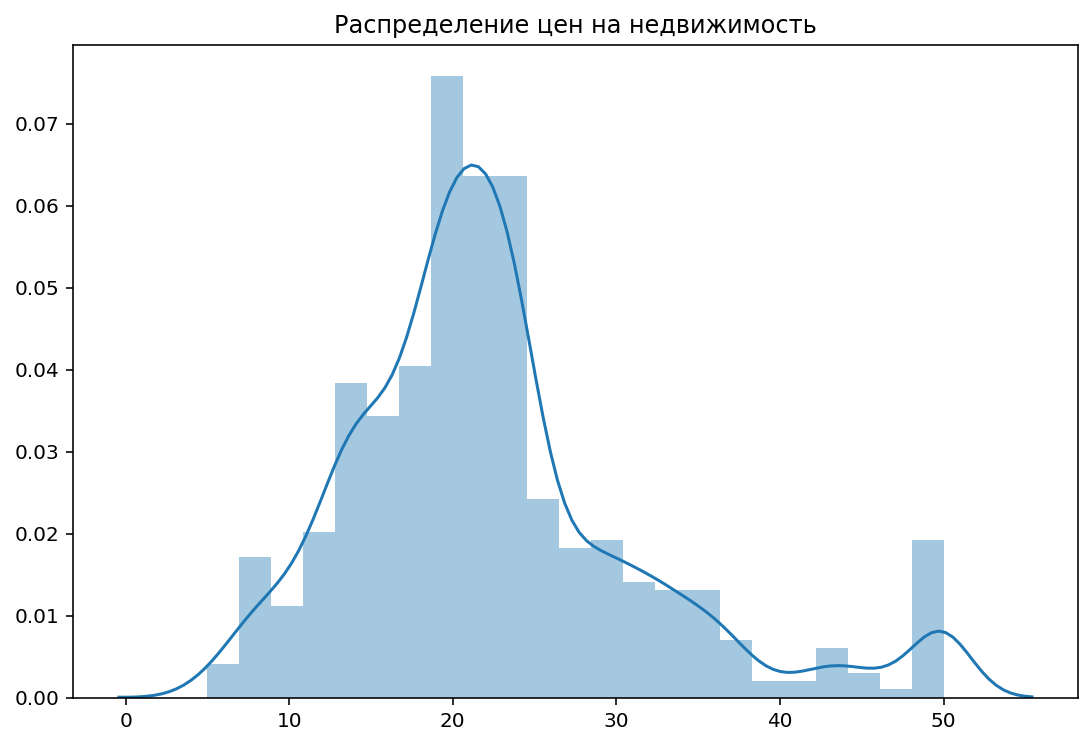

In [21]:
sns.distplot(y)
plt.title('Распределение цен на недвижимость')
plt.show()

### Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [ ]:
"""
make X_train, X_test, y_train, y_test
"""

In [45]:
train_share = 0.8
trian_size = int(X.shape[0]*train_share)

X_train = X[:trian_size]
X_test = X[trian_size:]

y_train = y[:trian_size]
y_test = y[trian_size:]

display(X_train.shape)
display(X_test.shape)
display(X.shape)

(404, 13)

(102, 13)

(506, 13)

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# print(X_train.shape)
# print(X_test.shape)

### Построение регрессии и предсказания по тестовой выборке

In [ ]:
"""
make y_pred
"""

In [46]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Оценка

In [ ]:
"""
make visual comparement 
"""

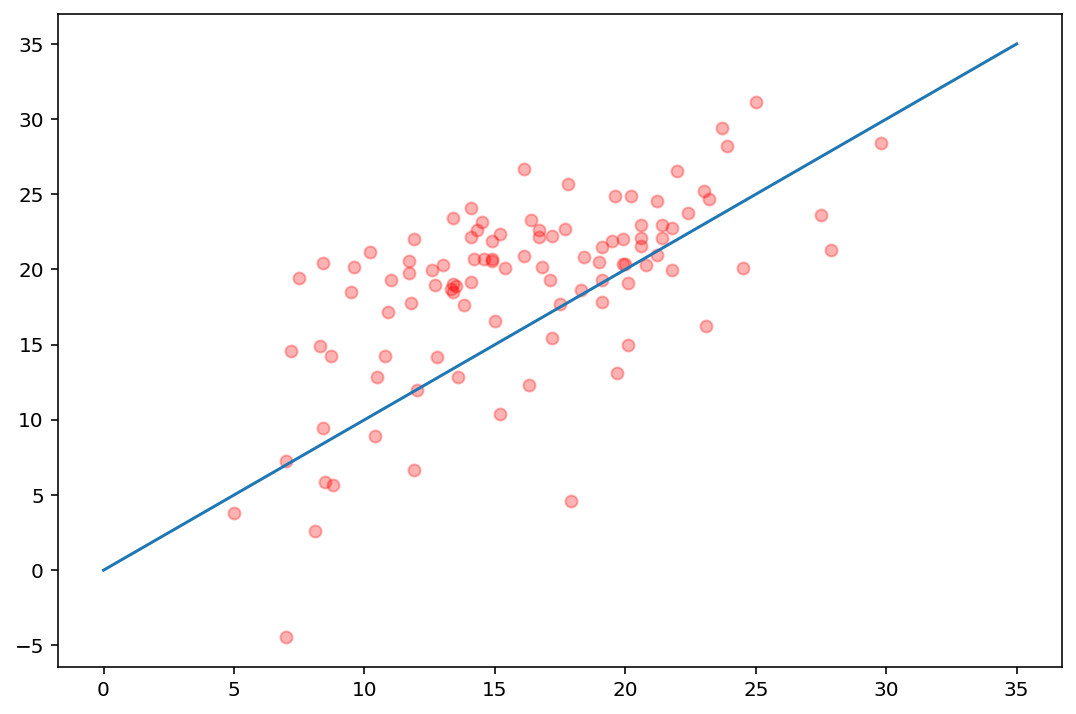

In [65]:
plt.plot(y_test, y_pred, 'ro', alpha=0.3)
plt.plot([0,35], [0,35]);

### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

In [ ]:
"""
count MSE
"""

In [53]:
# np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [59]:
MSE = np.mean((y_test - y_pred)**2)
print(MSE)

32.79986268020657


In [60]:
MSE**0.5

5.727116436760001

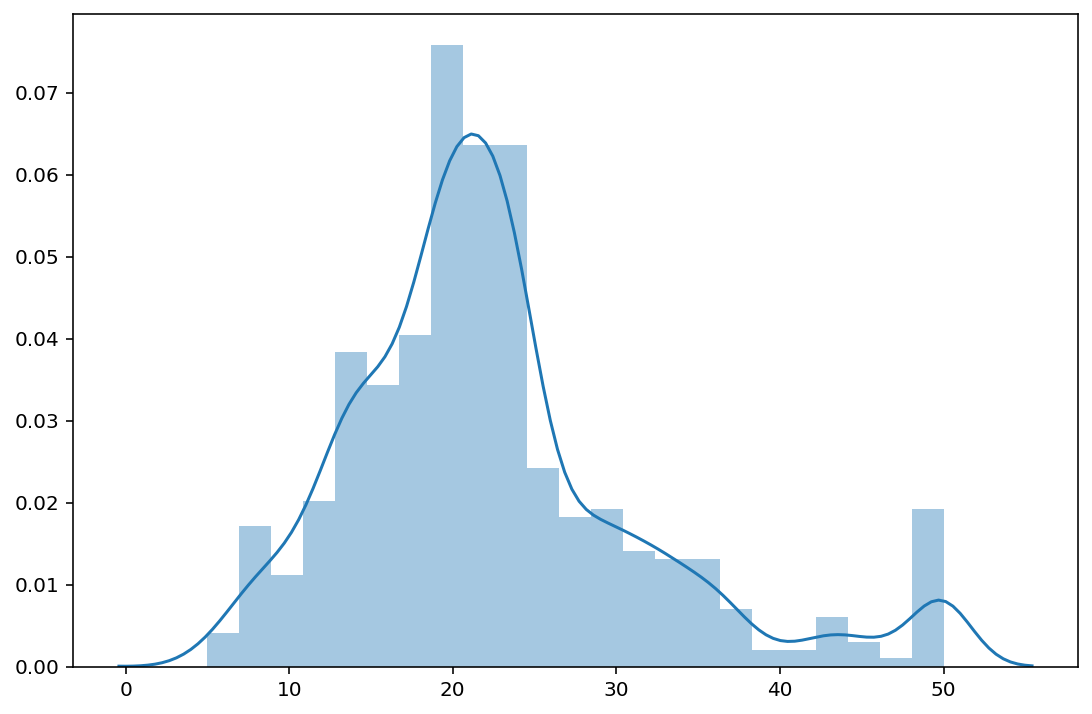

In [64]:
sns.distplot(y);

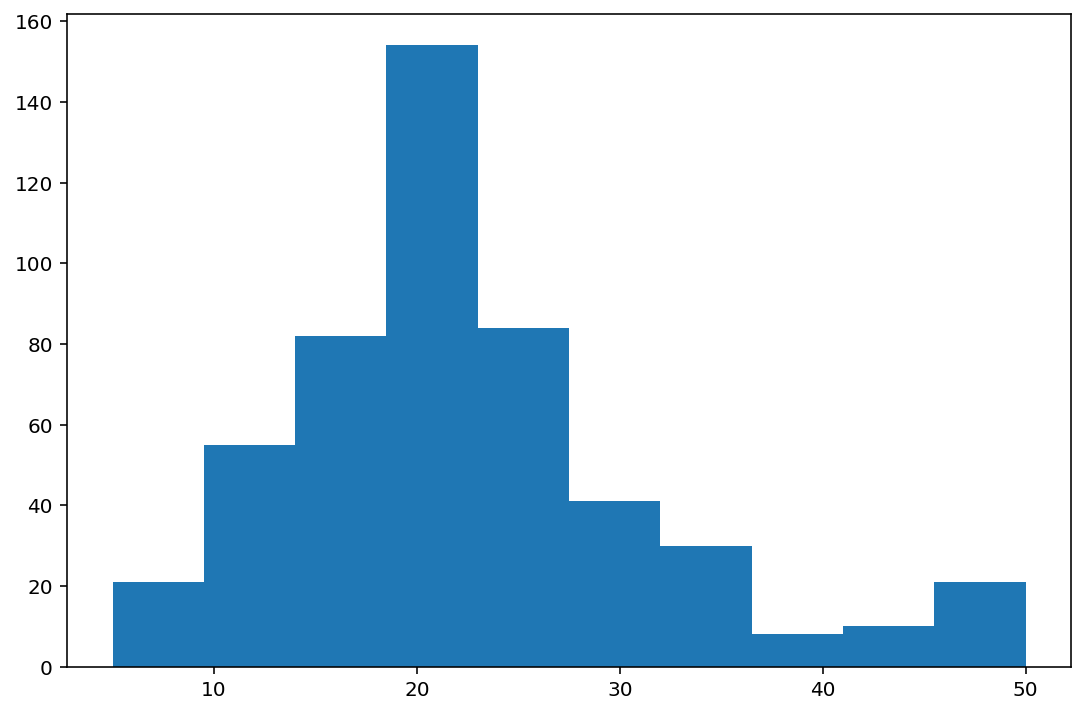

In [62]:
plt.hist(y);